<a href="https://colab.research.google.com/github/syhamham/AWA-Project/blob/main/pressure1_med.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 차압 - 비교존 DP Med

In [1]:
import pandas as pd
from prophet import Prophet

In [2]:
df = pd.read_excel('med-data.xlsx')
df.head()

ds           y
0 2023-09-25 09:55:00  293.000000
1 2023-09-25 09:56:00  289.333333
2 2023-09-25 09:57:00  289.666667
3 2023-09-25 09:58:00  291.333333
4 2023-09-25 09:59:00  291.333333

In [3]:
df.tail()

ds      y
38497 2023-10-23 11:36:00  246.5
38498 2023-10-23 11:37:00  248.0
38499 2023-10-23 11:38:00  248.0
38500 2023-10-23 11:39:00  249.0
38501 2023-10-23 11:40:00  246.0

In [4]:
m = Prophet()
m.fit(df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx4djo2nx/ib6rywax.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx4djo2nx/o2oatks5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92114', 'data', 'file=/tmp/tmpx4djo2nx/ib6rywax.json', 'init=/tmp/tmpx4djo2nx/o2oatks5.json', 'output', 'file=/tmp/tmpx4djo2nx/prophet_modeluyhtua3k/prophet_model-20240514072822.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:28:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:28:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [5]:
future = m.make_future_dataframe(periods=60, freq='1min')
future.tail(60)

ds
38491 2023-10-23 11:41:00
38492 2023-10-23 11:42:00
38493 2023-10-23 11:43:00
38494 2023-10-23 11:44:00
38495 2023-10-23 11:45:00
38496 2023-10-23 11:46:00
38497 2023-10-23 11:47:00
38498 2023-10-23 11:48:00
38499 2023-10-23 11:49:00
38500 2023-10-23 11:50:00
38501 2023-10-23 11:51:00
38502 2023-10-23 11:52:00
38503 2023-10-23 11:53:00
38504 2023-10-23 11:54:00
38505 2023-10-23 11:55:00
38506 2023-10-23 11:56:00
38507 2023-10-23 11:57:00
38508 2023-10-23 11:58:00
38509 2023-10-23 11:59:00
38510 2023-10-23 12:00:00
38511 2023-10-23 12:01:00
38512 2023-10-23 12:02:00
38513 2023-10-23 12:03:00
38514 2023-10-23 12:04:00
38515 2023-10-23 12:05:00
38516 2023-10-23 12:06:00
38517 2023-10-23 12:07:00
38518 2023-10-23 12:08:00
38519 2023-10-23 12:09:00
38520 2023-10-23 12:10:00
38521 2023-10-23 12:11:00
38522 2023-10-23 12:12:00
38523 2023-10-23 12:13:00
38524 2023-10-23 12:14:00
38525 2023-10-23 12:15:00
38526 2023-10-23 12:16:00
38527 2023-10-23 12:17:00
38528 2023-10-23 12:18:00
38529 2023-10-23 12:19:00
38530 2023-10-23 12:20:00
38531 2023-10-23 12:21:00
38532 2023-10-23 12:22:00
38533 2023-10-23 12:23:00
38534 2023-10-23 12:24:00
38535 2023-10-23 12:25:00
38536 2023-10-23 12:26:00
38537 2023-10-23 12:27:00
38538 2023-10-23 12:28:00
38539 2023-10-23 12:29:00
38540 2023-10-23 12:30:00
38541 2023-10-23 12:31:00
38542 2023-10-23 12:32:00
38543 2023-10-23 12:33:00
38544 2023-10-23 12:34:00
38545 2023-10-23 12:35:00
38546 2023-10-23 12:36:00
38547 2023-10-23 12:37:00
38548 2023-10-23 12:38:00
38549 2023-10-23 12:39:00
38550 2023-10-23 12:40:00

In [6]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds        yhat  yhat_lower  yhat_upper
38546 2023-10-23 12:36:00  241.059955  233.458897  247.928479
38547 2023-10-23 12:37:00  241.029539  234.003070  247.887172
38548 2023-10-23 12:38:00  240.998955  233.760167  247.636497
38549 2023-10-23 12:39:00  240.968206  233.757995  248.238056
38550 2023-10-23 12:40:00  240.937295  233.528543  248.182127

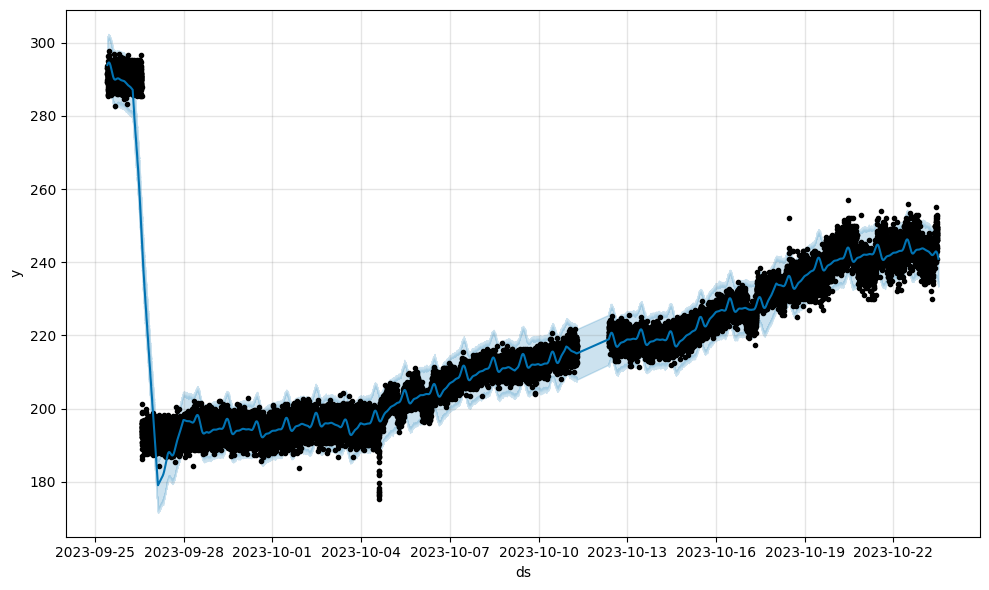

In [7]:
fig1 = m.plot(forecast)
fig1.show()

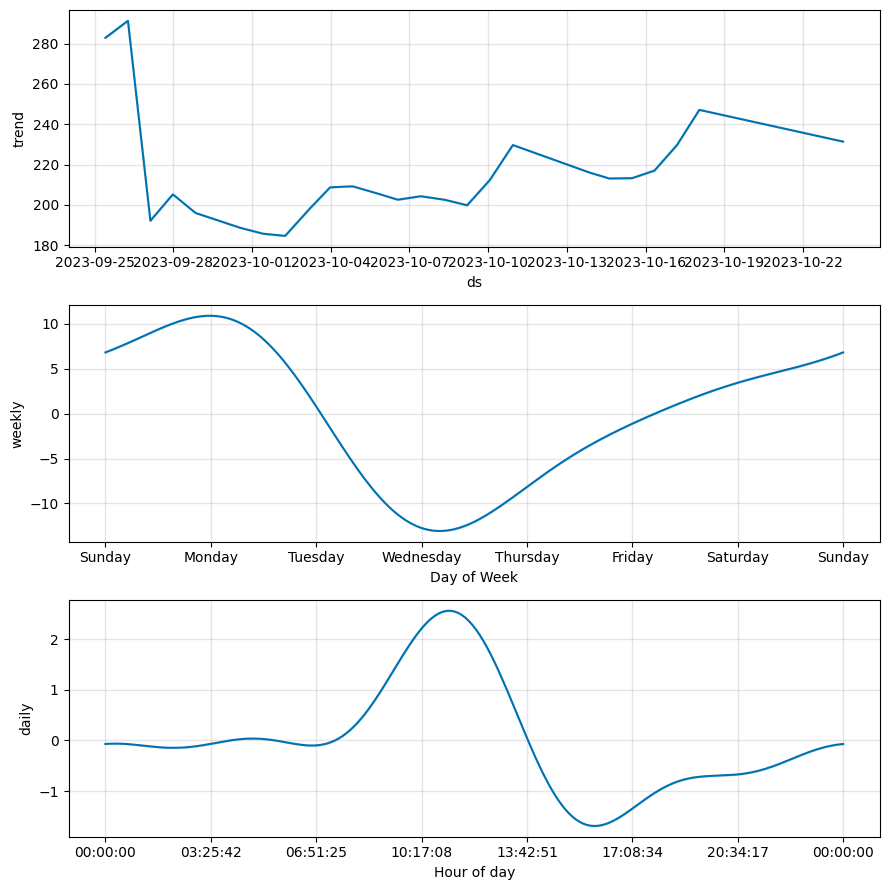

In [8]:
fig2 = m.plot_components(forecast)
fig2.show()

In [9]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [10]:
plot_components_plotly(m, forecast)